In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=1.3)

from statannot import add_stat_annotation
from scipy.stats import shapiro, levene

In [4]:
df = pd.read_csv('CIBERSORT_binary_hierclsdded.txt', sep='\t', index_col=0)

In [5]:
df.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Pearson Correlation,RMSE,Hier_k3,vital_status,days
TCGA-BA-5149-01,0.002285,0.000000,0.016104,0.073119,0.0,0.214040,0.000000,0.120155,0.032529,0.0,...,0.000000,0.049705,0.006957,0.000000,0.05,0.189236,1.032236,0,1,26.48
TCGA-BA-5152-01,0.000000,0.024302,0.000000,0.034400,0.0,0.151825,0.009203,0.121081,0.074251,0.0,...,0.000000,0.021897,0.000000,0.000000,0.00,0.258048,0.989101,1,0,42.31
TCGA-BA-5153-01,0.000000,0.000000,0.054700,0.132824,0.0,0.227186,0.039619,0.107129,0.054469,0.0,...,0.000000,0.000000,0.000000,0.000000,0.02,0.209568,1.018717,1,1,57.88
TCGA-BA-5556-01,0.060200,0.000000,0.010502,0.097327,0.0,0.188331,0.030917,0.076443,0.025915,0.0,...,0.050753,0.000000,0.000000,0.000000,0.00,0.427160,0.905327,1,0,23.82
TCGA-BA-5558-01,0.012238,0.000000,0.000000,0.005443,0.0,0.155413,0.000000,0.090174,0.022876,0.0,...,0.057773,0.061574,0.000000,0.017786,0.01,0.248327,0.998695,0,0,65.54


In [27]:
df['Hier_k3'] = df['Hier_k3'].replace(0,'High_risk')
df['Hier_k3'] = df['Hier_k3'].replace(1,'Low_risk')

hl = df['Hier_k3'] == 'High_risk'
ll = df['Hier_k3'] == 'Low_risk'

In [96]:
lm22 = []

for i in range(df[hl].iloc[:,0:-6].shape[1]):
    for j in range(df[hl].iloc[:,0:-6].shape[0]):
        lm22.append(df[hl].iloc[j,i])

lm22_hl = pd.DataFrame(lm22, columns=['value'])

lm22_hl['name'] = 'High_risk'

temp = []
for i in range(len(list(df.columns[0:-6]))):
    for j in range(df[hl].iloc[:,0:-6].shape[0]):
        temp.append(list(df.columns[0:-6])[i])
        
lm22_hl['type'] = temp

In [98]:
lm22 = []

for i in range(df[ll].iloc[:,0:-6].shape[1]):
    for j in range(df[ll].iloc[:,0:-6].shape[0]):
        lm22.append(df[ll].iloc[j,i])

lm22_ll = pd.DataFrame(lm22, columns=['value'])

lm22_ll['name'] = 'Low_risk'

temp = []
for i in range(len(list(df.columns[0:-6]))):
    for j in range(df[ll].iloc[:,0:-6].shape[0]):
        temp.append(list(df.columns[0:-6])[i])
        
lm22_ll['type'] = temp

In [102]:
table = lm22_hl.append(lm22_ll)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Low_risk v.s. High_risk: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.414e-02 U_stat=4.459e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Low_risk v.s. High_risk: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.630e-03 U_stat=4.366e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Low_risk v.s. High_risk: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.727e-01 U_stat=3.480e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e

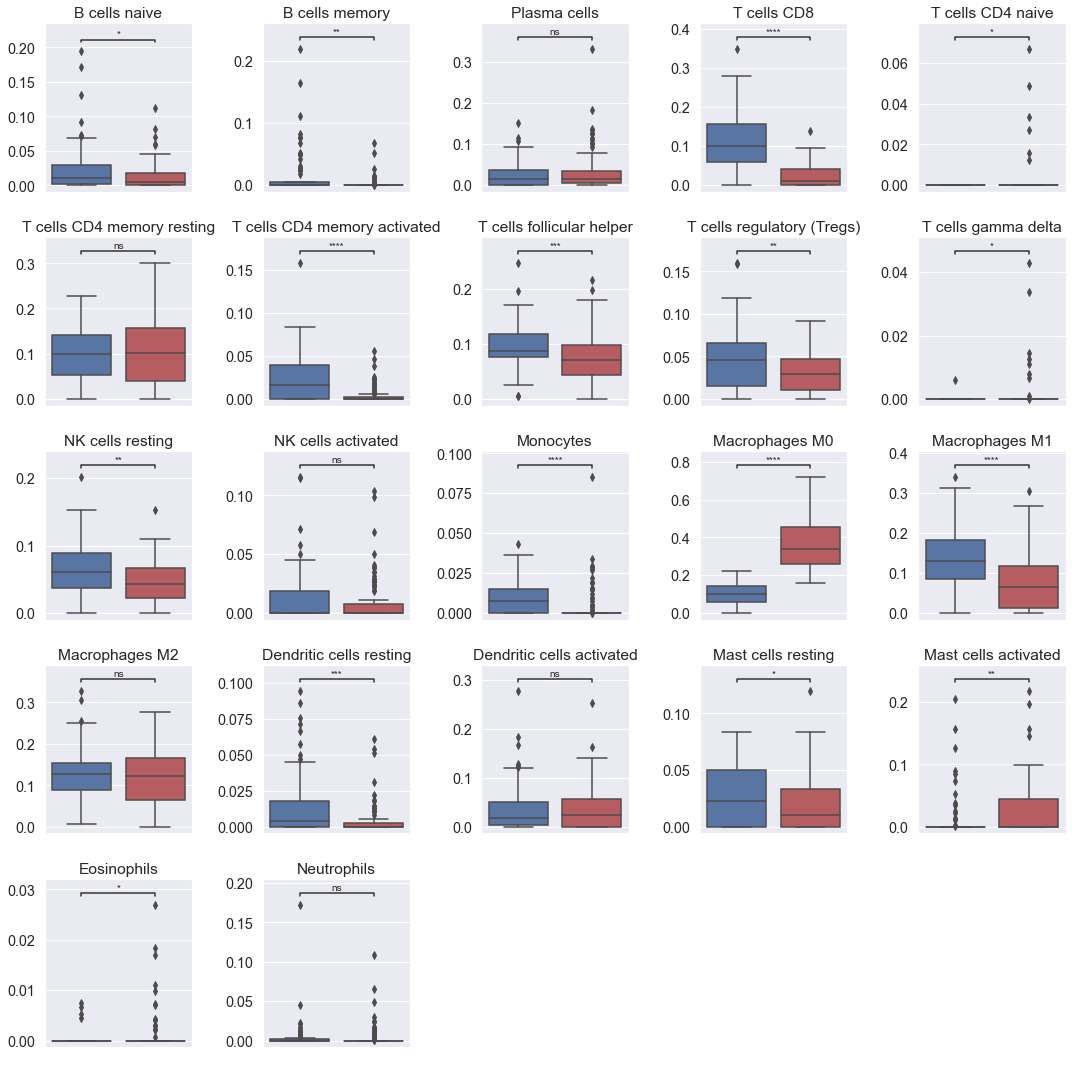

In [104]:
a = []
a1 = []
a2 = []
a3 = []
a4 = []
a5 = []
a6 = []
a7 = []
a8 = []
a9 = []
a10 = []
a11 = []
a12 = []
a13 = []
a14 = []
a15 = []
a16 = []
a17 = []
a18 = []
a19 = []
a20 = []
a21 = []
a22 = []
    
gene = [a,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22]
name = list(table['type'].unique())

for i in range(0, len(gene)):
    table2 = table[table['type'] == name[i]]
    rel = table2['name'] == ('High_risk')
    dia = table2['name'] == ('Low_risk')
    gene[i] = table2[dia].append(table2[rel])
    
    
fig = plt.figure(figsize=(15,15))
for i in range(0,len(gene)):    
    fig.add_subplot(5, 5, i+1)

    f1 = sns.boxplot(data=gene[i], x = gene[i]['name'], y = gene[i]['value'], palette=['b','r'])
    #f1.set_ylim(0, max(max(smc2['value']),max(smc4['value']))+100)
    #sns.stripplot(data=gene[i], x = gene[i]['name'], y = gene[i]['value'], jitter=True, alpha=0.5)
                   
    plt.xticks([1,2], ['  ','  '], rotation='vertical')
    plt.xlabel('')
    plt.ylabel('')
    f1.set_title('%s' %name[i])
    
    
#     if shapiro(gene[i]['value'])[1] > 0.05:
#         m = gene[i]['name'] == 'High_risk'
#         if levene(gene[i][m]['value'],gene[i][-m]['value'])[1] > 0.05:
#             add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
#                         box_pairs=[(("Low_risk"), ("High_risk"))
#                                     ],
#                         test='t-test_ind', text_format='star', loc='inside', verbose=2)
#         else:
#             add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
#                         box_pairs=[(("Low_risk"), ("High_risk"))
#                                     ],
#                         test='t-test_welch', text_format='star', loc='inside', verbose=2)
#     else:
#         add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
#                     box_pairs=[(("Low_risk"), ("High_risk"))
#                                 ],
#                     test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

    add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
                box_pairs=[(("Low_risk"), ("High_risk"))
                            ],
                test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
        
        
    fig.tight_layout()
    plt.savefig('./res.png', dpi=300, bbox_inches='tight')